In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

Use the iris database to answer the following quesitons:

In [2]:
iris = data('iris')

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
iris = iris.rename(columns={'Sepal.Length':'sepal_length', 'Sepal.Width':'sepal_width',
                           'Petal.Width':'petal_width', 'Petal.Length':'petal_length',
                           'Species':'species'})

In [5]:
iris['petal_length'].value_counts()

1.4    13
1.5    13
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: petal_length, dtype: int64

1. What does the distribution of petal lengths look like?

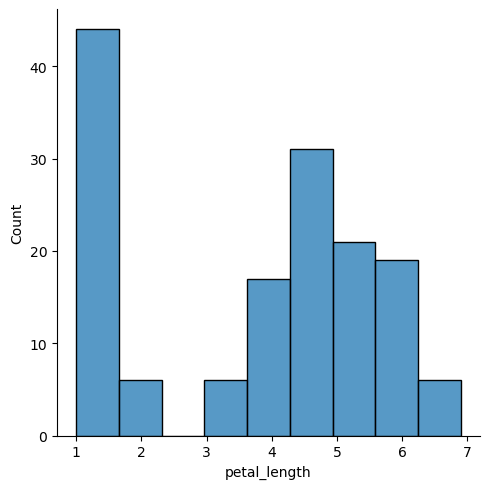

In [10]:
sns.displot(data=iris, 
            x='petal_length')
plt.show()

2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

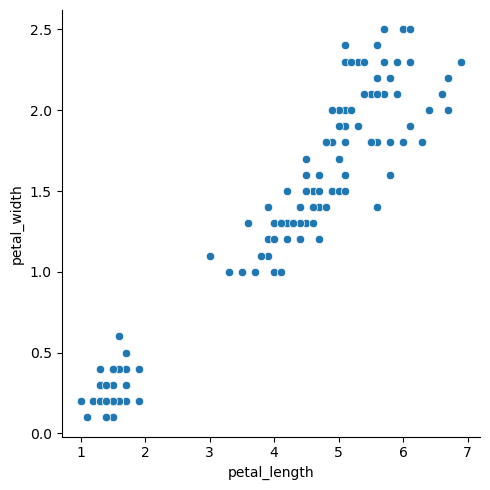

In [13]:
sns.relplot(data=iris,
           x='petal_length',
           y='petal_width')
plt.show()

There appears to be a correlation between petal length and petal width.

3. Would it be reasonable to predict species based on sepal width and sepal length? 
For this, you'll visualize two numeric columns through the lense of a categorical column.

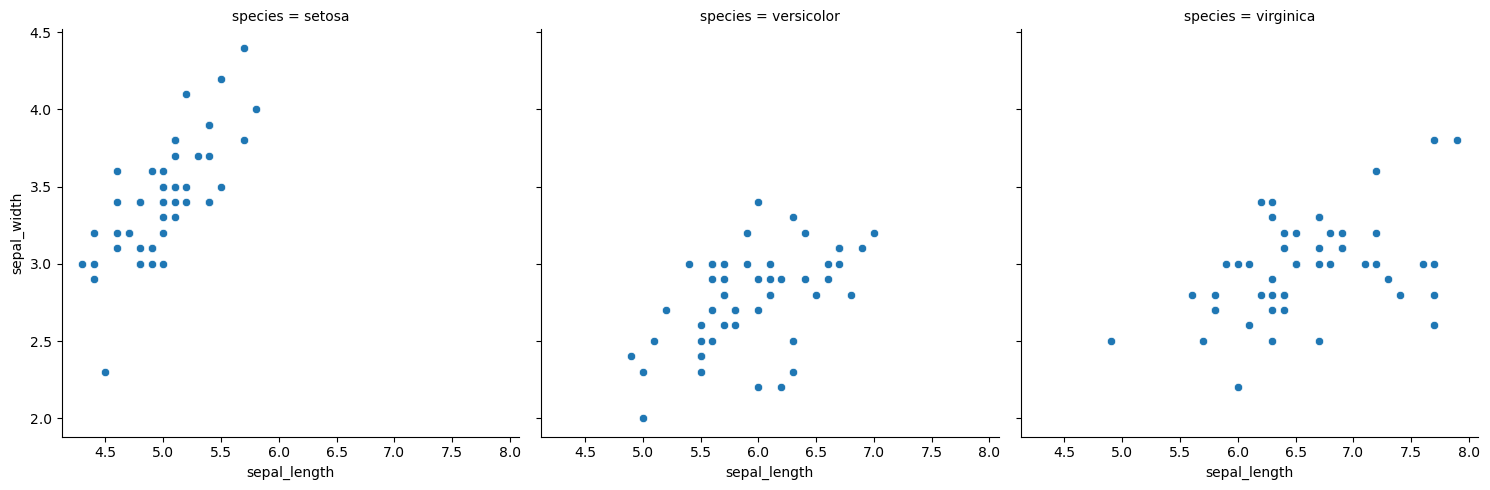

In [18]:
sns.relplot(data=iris,
               x='sepal_length',
               y='sepal_width',
               col='species')
plt.show()

Sepal length and width does seem like a reasonable predictor for the setosa species, but not as good between the versicolor and virginica species.

4. Which features would be best used to predict species?

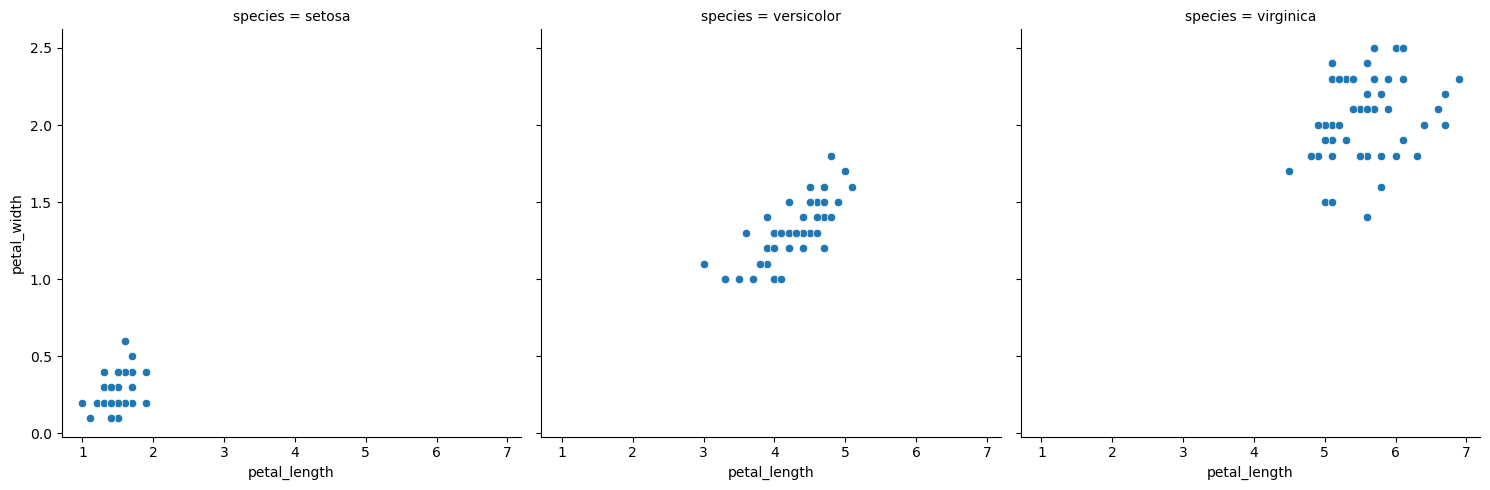

In [19]:
sns.relplot(data=iris,
               x='petal_length',
               y='petal_width',
               col='species')
plt.show()

Petal length and width seems like the best predictors of species

### Part 2
1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [20]:
anscombe = sns.load_dataset('anscombe')

In [21]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [23]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

The x-1, x-2 and x-3 datasets appear to be the same as each other, the x-4 has more variation, but the same mean and stddev as the others.

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

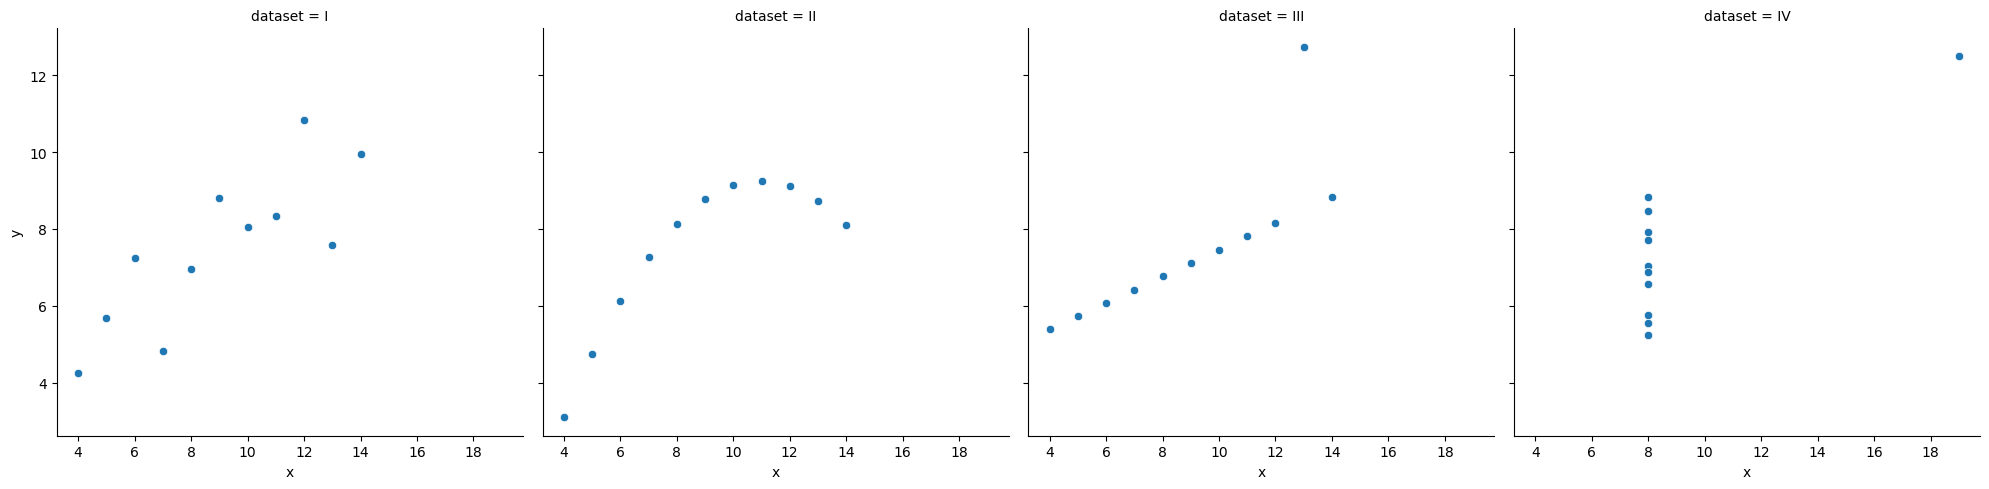

In [26]:
sns.relplot(data=anscombe,
           x='x',
           y='y',
           col='dataset')
plt.show()

2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [33]:
insect = data('InsectSprays')

In [34]:
insect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   72 non-null     int64 
 1   spray   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [35]:
insect.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


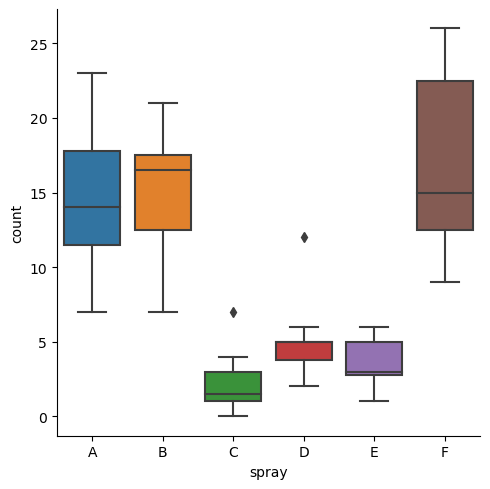

In [38]:
sns.catplot(data=insect,
           x='spray',
           y='count',
           kind='box')
plt.show()

3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

In [39]:
swiss = data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [41]:
swiss = data('swiss')

In [42]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


a. Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [46]:
swiss['is_catholic'] = swiss.Catholic >= 70

b. Does whether or not a province is Catholic influence fertility?

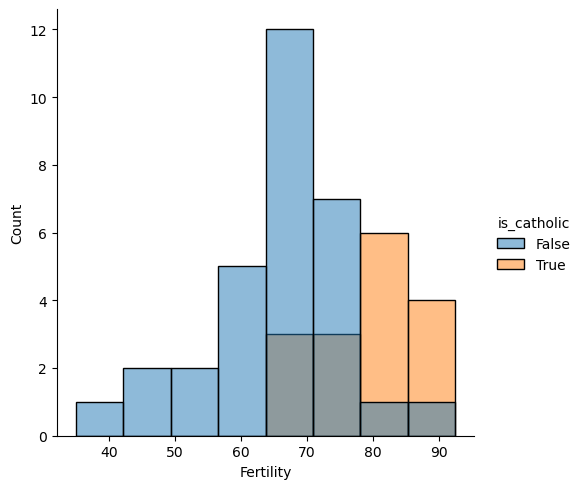

In [56]:
sns.displot(data=swiss,
            x='Fertility',
            hue='is_catholic')
plt.show()

Whether or not a province is Catholic does influence fertility

3. What measure correlates most strongly with fertility?

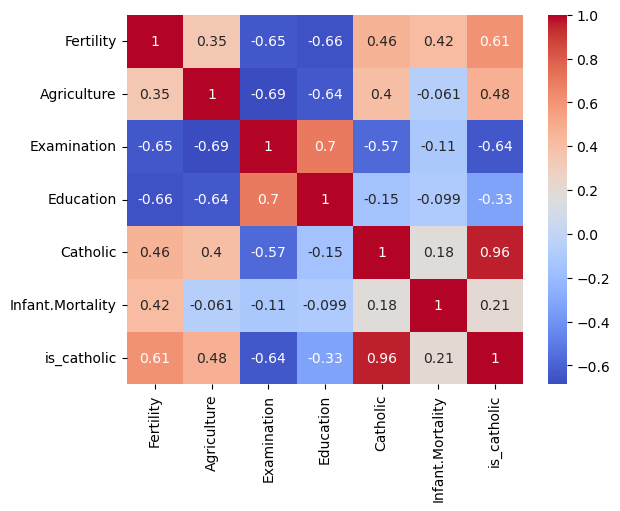

In [60]:
sns.heatmap(swiss.corr(),
           annot=True,
           cmap='coolwarm',
           )
plt.show()

Whether or not a province is Catholic is the strongest correlation to fertility rate

4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [63]:
import env

In [74]:
connection = env.get_db_url('chipotle')
query = 'SELECT * FROM orders'
df = pd.read_sql(query, connection)

In [75]:
df.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [76]:
df['item_price'] = df.item_price.str.replace('$','',regex=False).astype(float)

In [78]:
df.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [138]:
top_4 = df[df.item_name.isin(df.groupby('item_name').agg(sum).item_price.nlargest(4).index)]

In [142]:
top_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1858 entries, 4 to 4618
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1858 non-null   int64  
 1   order_id            1858 non-null   int64  
 2   quantity            1858 non-null   int64  
 3   item_name           1858 non-null   object 
 4   choice_description  1858 non-null   object 
 5   item_price          1858 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 101.6+ KB


In [146]:
top_4 = top_4.groupby('item_name').sum()

In [151]:
top_4 = top_4.reset_index()

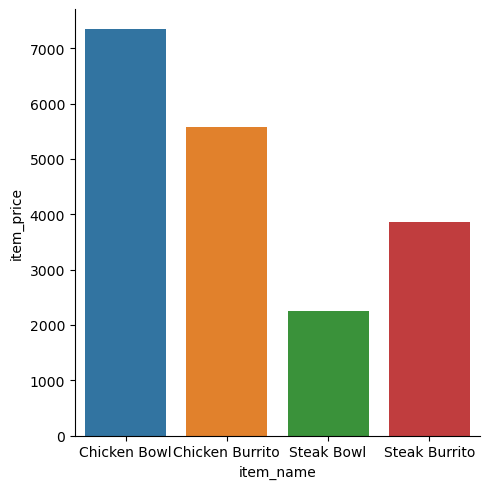

In [152]:
sns.catplot(data=top_4,
           x='item_name',
           y='item_price',
           kind='bar')
plt.show()

5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [153]:
sleep = data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [154]:
sleep = data('sleepstudy')

In [155]:
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


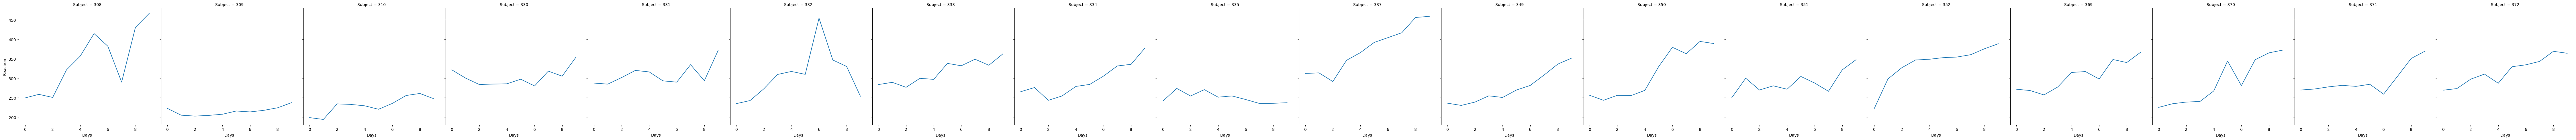

In [160]:
sns.relplot(data=sleep,
           x='Days',
           y='Reaction',
           col='Subject',
           kind='line')
plt.show()